<a href="https://colab.research.google.com/github/Santhose-DOC/Ex-3--AAI/blob/main/AAI03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 16.8 MB/s eta 0:00:00


In [3]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import GibbsSampling
import networkx as nx
import matplotlib.pyplot as plt


In [13]:
# Define Bayesian Network structure
alarm_model = DiscreteBayesianNetwork([
    ("Burglary", "Alarm"),
    ("Earthquake", "Alarm"),
    ("Alarm", "JohnCalls"),
    ("Alarm", "MaryCalls")
])

In [12]:
# Define CPTs
cpd_b = TabularCPD("Burglary", 2, [[0.999], [0.001]])
cpd_e = TabularCPD("Earthquake", 2, [[0.998], [0.002]])

cpd_a = TabularCPD(
    "Alarm", 2,
    [[0.999, 0.71, 0.06, 0.05],
     [0.001, 0.29, 0.94, 0.95]],
    evidence=["Burglary", "Earthquake"],
    evidence_card=[2, 2]
)

cpd_j = TabularCPD(
    "JohnCalls", 2,
    [[0.95, 0.1],
     [0.05, 0.9]],
    evidence=["Alarm"],
    evidence_card=[2]
)

cpd_m = TabularCPD(
    "MaryCalls", 2,
    [[0.99, 0.3],
     [0.01, 0.7]],
    evidence=["Alarm"],
    evidence_card=[2]
)

In [14]:
# Add CPTs and check model
alarm_model.add_cpds(cpd_b, cpd_e, cpd_a, cpd_j, cpd_m)
alarm_model.check_model()


True

In [15]:
# -------- Approximate Inference using Gibbs Sampling --------
gibbs_sampler = GibbsSampling(alarm_model)

num_samples = 50000
samples = gibbs_sampler.sample(size=num_samples)

  0%|          | 0/49999 [00:00<?, ?it/s]

In [22]:
# Define evidence
evidence_samples = samples[
    (samples["JohnCalls"] == 1) &
    (samples["MaryCalls"] == 1)
]

# Estimate probability of Burglary given evidence
query_variable = "Burglary"
query_result = evidence_samples[query_variable].value_counts(normalize=True)

print("\nApproximate probabilities of {} given evidence:".format(query_variable))
print(query_result)



Approximate probabilities of Burglary given evidence:
Burglary
0    0.766355
1    0.233645
Name: proportion, dtype: float64


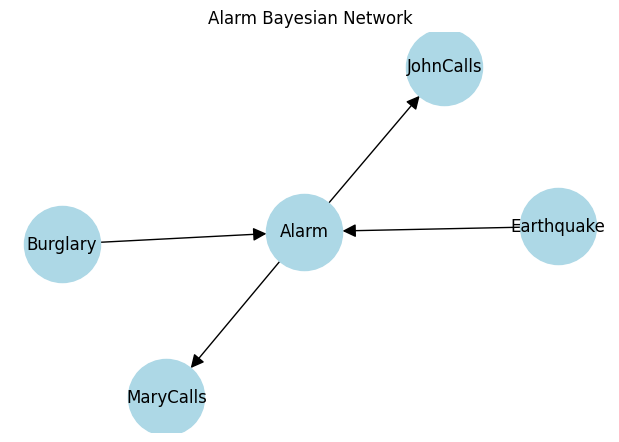

In [59]:
# -------- Draw Bayesian Network diagram --------
G = nx.DiGraph(alarm_model.edges())
plt.figure(figsize=(6,4))
nx.draw(G, with_labels=True, node_size=3000, node_color="lightblue", arrowsize=20)
plt.title("Alarm Bayesian Network")
plt.show()